In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# group_C 
> 본 캐릭터와 부 캐릭터 둘다 육성하는 그룹

In [14]:
X_train1=pd.read_csv('../X_train_final.csv')
X_train1=X_train1.fillna(0)
X_test1=pd.read_csv('../X_test_final.csv')
X_test1=X_test1.fillna(0)
train_label=pd.read_csv('../lite_data/train_label_lite.csv')

In [77]:
detec=pd.concat([train_label,X_train1],axis=1)

In [78]:
detect=detec[detec.group_c==True]

In [6]:
plt.style.use('ggplot')

In [156]:
detect.label.value_counts()

week        14858
month        6287
retained     6214
2month       1834
Name: label, dtype: int64

 # 그룹내 클래스
 
 > 2month가 가장 적고, week가 가장 많다.  나머지 클래스는 6천명으로 엇비슷

# 전투시간 대비 trade 횟수 그룹별 분포

## 집단별로 차이가 두드러짐.
> 이탈 고객중 month클래스의 유저들 일부분이 일정구간에서 전투 시간대비 거래 횟수에서 높은 비율을 보이고 있다.

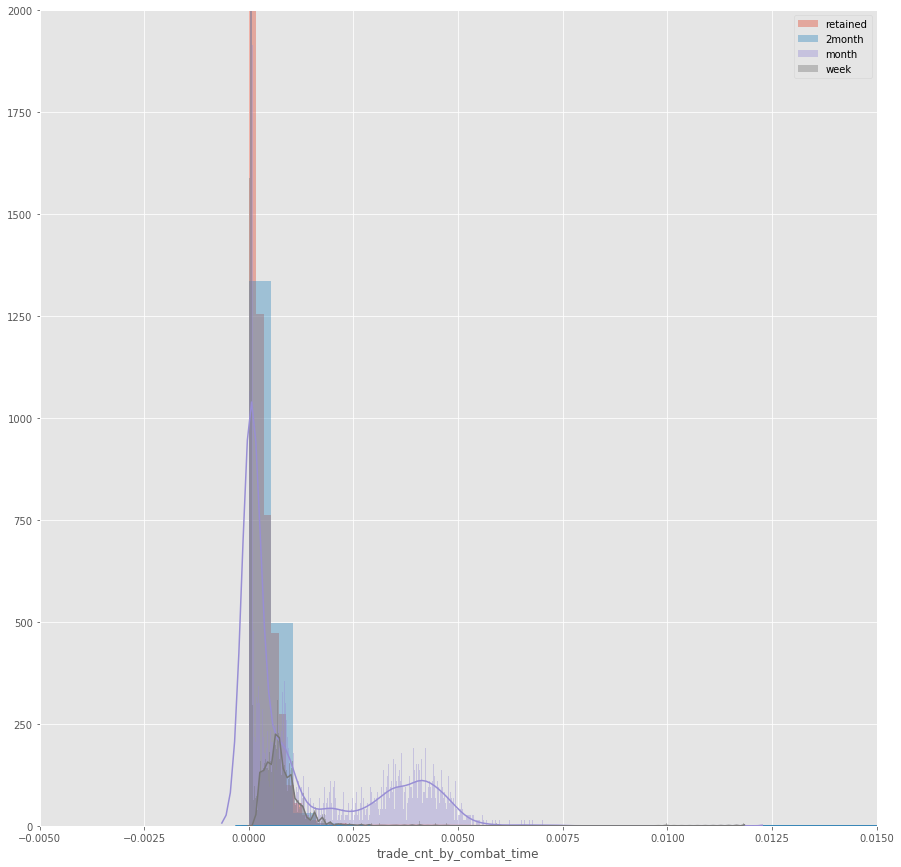

In [218]:
plt.figure(figsize=(15,15))
sns.distplot(detect[detect.label=='retained'].trade_cnt_by_combat_time,label='retained',bins=1000).set_xlim(-0.005,0.015)
sns.distplot(detect[detect.label=='2month'].trade_cnt_by_combat_time,label='2month',bins=1000).set_ylim(0,2000)
sns.distplot(detect[detect.label=='month'].trade_cnt_by_combat_time,label='month',bins=1000)
sns.distplot(detect[detect.label=='week'].trade_cnt_by_combat_time,label='week',bins=1000)

plt.legend()
plt.show()

## 바이올린 플롯을 통해 
> month week 라벨의 유저들의 분포가 비율에서 가장 하위에 위치함을 알 수 있다

(0, 0.025)

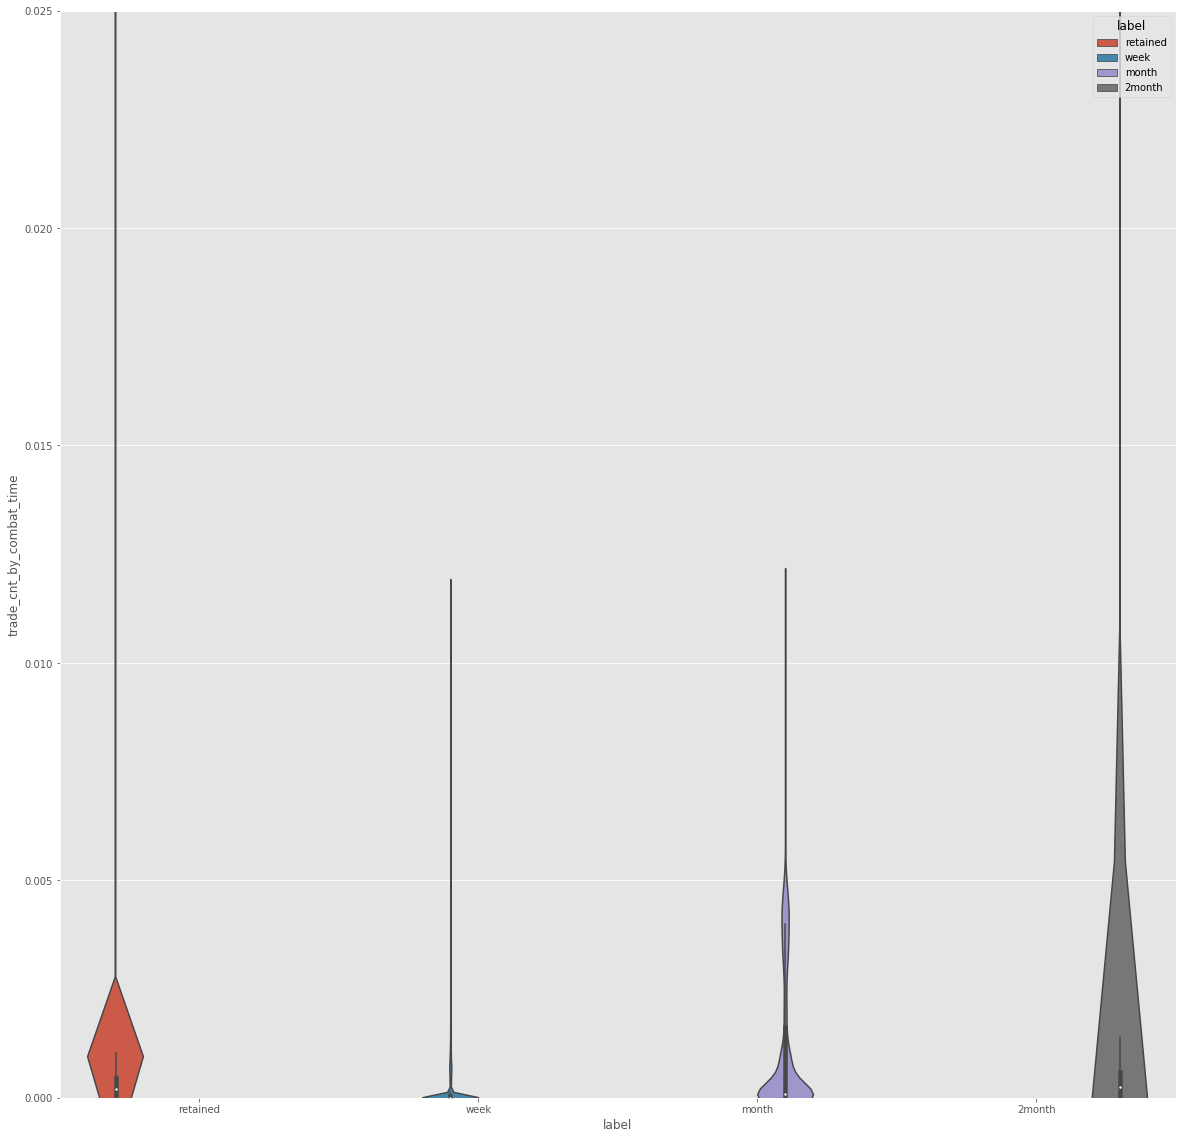

In [172]:
plt.figure(figsize=(20,20))
sns.violinplot(x=detect.label,y=detect.trade_cnt_by_combat_time,
               hue=detect.label).set_ylim(0,0.025)

# retained 클래스와 2month는 거래 횟수와 전투시간 비율이 대부분 비슷하다


>
> week 계층 또한 비슷하나, 보통 전투시간과 거래의 절대적인 횟수가 위의 두 클래스의 유저에 비해  훨씬 낮다.


## 하지만 month계층의 일부 유저들은 다른 클래스보다 전투시간 대비 거래횟수 비율이 더 높다.

> 보통 부캐를 키우는 이유는 본캐의 직업이나 레벨에 싫증을 느껴 새로운 시도로써 다른 직업을 가진 부캐를 생성하게된다.

> 대부분 본캐가 더 고렙이기 때문에 본캐가 갖고있는 돈으로 부캐릭터의 아이템을 서브하게 된다. 

> 한달 내에 이탈하는 고객들은 부캐를 키우기 위해 전투시간을 할당하지 않고 오히려 거래에 더 시간을 투자하고 있다고 볼 수있다.

> 즉 다른 클래스에 비해 부캐의 전투를 덜하고 오히려 유저간의 거래를 하는데 더 많은 시간을 투자하게 된다.

>> 아마 게임내 실질적인 플레이시간(전투시간)이 낮아지며, 부캐 육성에 또한 싫증을 느껴 이탈을 하게 된다고 유추할 수 있다.

# chats_by_play_time (플레이시간 대비 채팅)

# 바이올린 플롯

> 다른 이탈유저들에 비해 retained 클래스 유저들은 높은 사회활동(다른유저간의 채팅) 비율을 보이고 있다.

(0, 0.05)

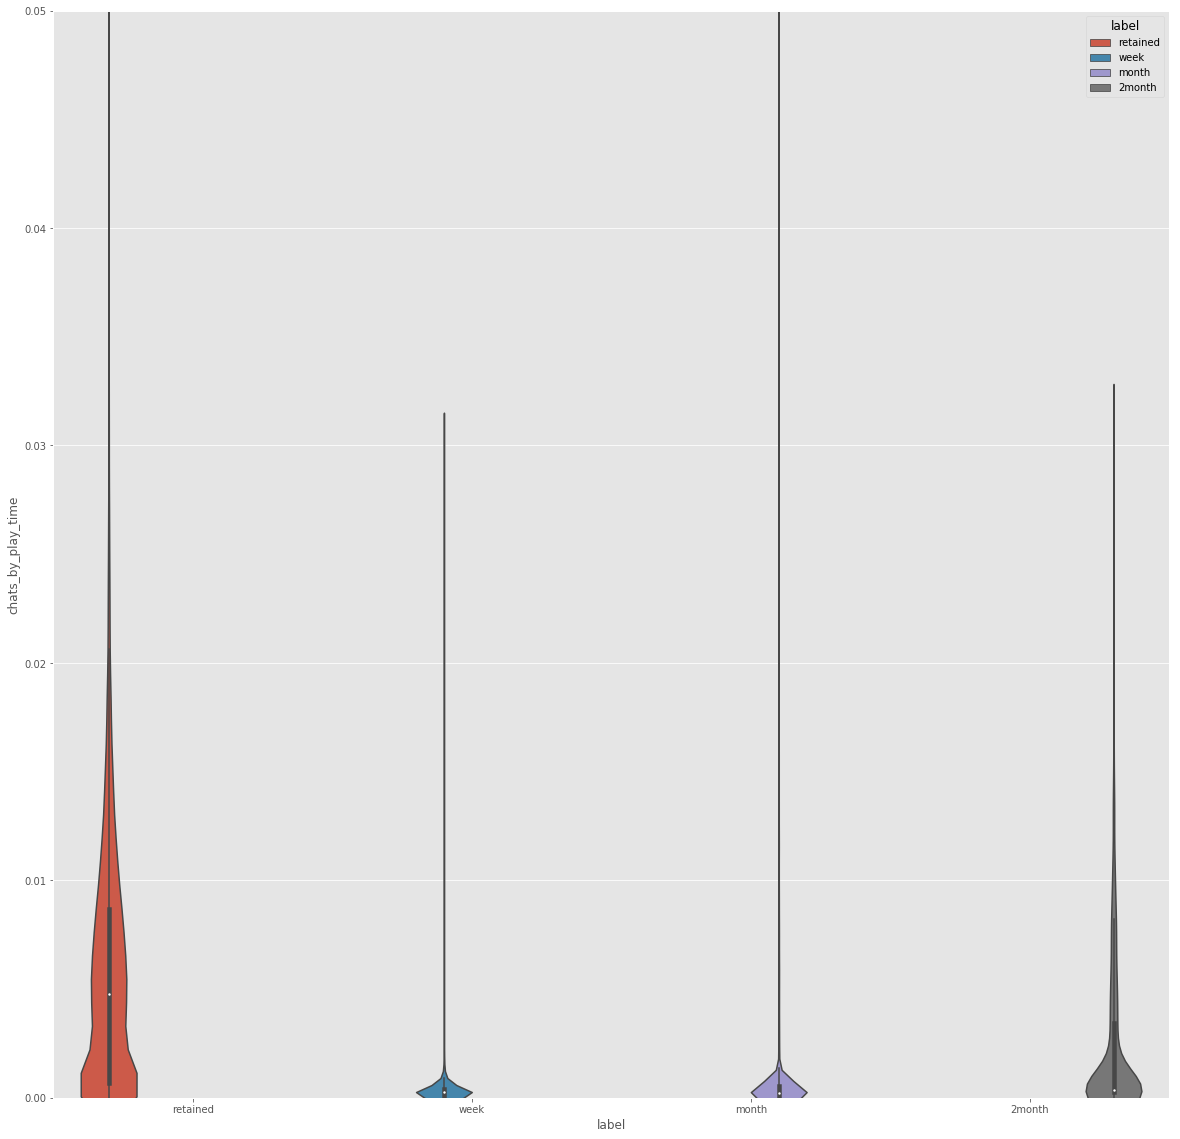

In [178]:
plt.figure(figsize=(20,20))
sns.violinplot(x=detect.label,y=detect.chats_by_play_time,
               hue=detect.label).set_ylim(0,0.05)

# 실수 분포 플롯

> 이탈하지 않은 고객이 확실히 이탈고객에 비해 더 높은 비율을 갖는다

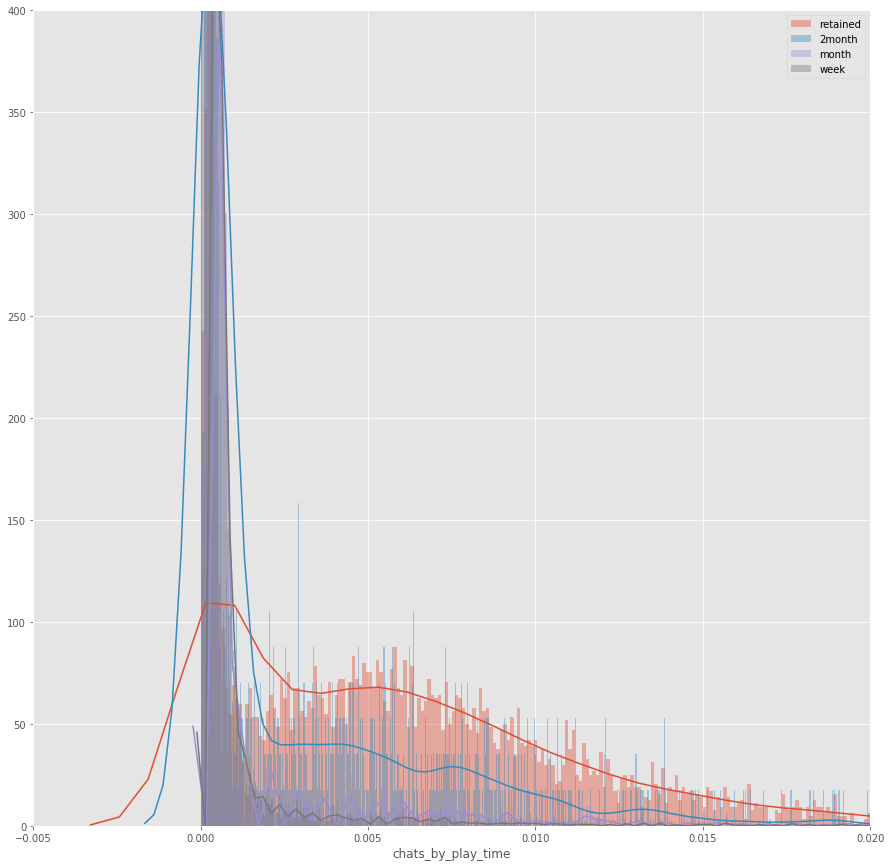

In [188]:
plt.figure(figsize=(15,15))
sns.distplot(detect[detect.label=='retained'].chats_by_play_time,label='retained',bins=1000).set_xlim(-0.005,0.02)
sns.distplot(detect[detect.label=='2month'].chats_by_play_time,label='2month',bins=1000).set_ylim(0,400)
sns.distplot(detect[detect.label=='month'].chats_by_play_time,label='month',bins=1000)
sns.distplot(detect[detect.label=='week'].chats_by_play_time,label='week',bins=1000)

plt.legend()
plt.show()

## 즉. 이탈고객은 비이탈 고객보다 본캐 부캐에 상관없이 사회적 활동이 현저히 떨어진다.

# 본캐 부캐 둘다 키우는 유저의 경우


## retained 클래스 경우

> 본캐던 부캐던 아마 게임 플레이시간 대비 채팅비율 또한 높다  

## 이탈 고객의 경우
> 이탈고객 특히 week 클래스와 month 라벨 유저들이 게임시간 대비 채팅 비율이 많이 낮다 
> 이탈 유저들은 게임을 하는데 있어서 필요할 다른 유저간의 사회적 관계가 떨어진다고 볼 수 있다. 이 또한 본캐에서도 게임내에서 그렇게 친밀한 다른유저가 없음을 알 수 있다.

# play_time_diff_w2_by_last_time_series (마지막 주차 대비 2주차의 접속시간)

# 바이올린 플롯

> retaind 고객들의 차이가 그렇게 크지않음을 알 수있다.

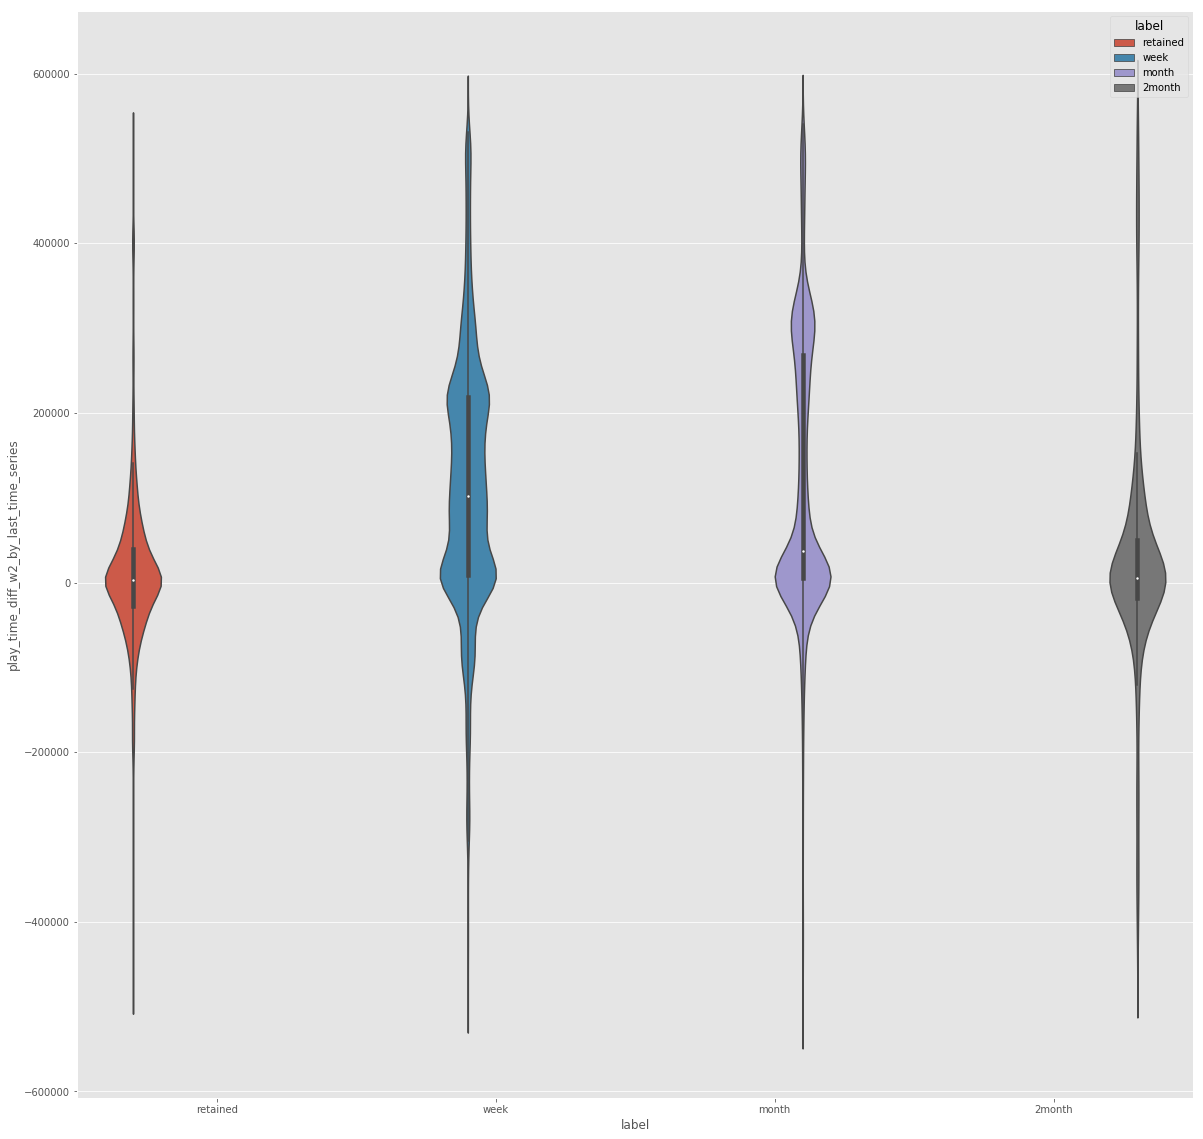

In [166]:
plt.figure(figsize=(20,20))
sns.violinplot(x=detect.label,y=detect.play_time_diff_w2_by_last_time_series,
               hue=detect.label)#.set_ylim(0,100000)

# 실수 분포 플롯

> retaind 고객들의 차이가 그렇게 크지않음을 알 수있다.

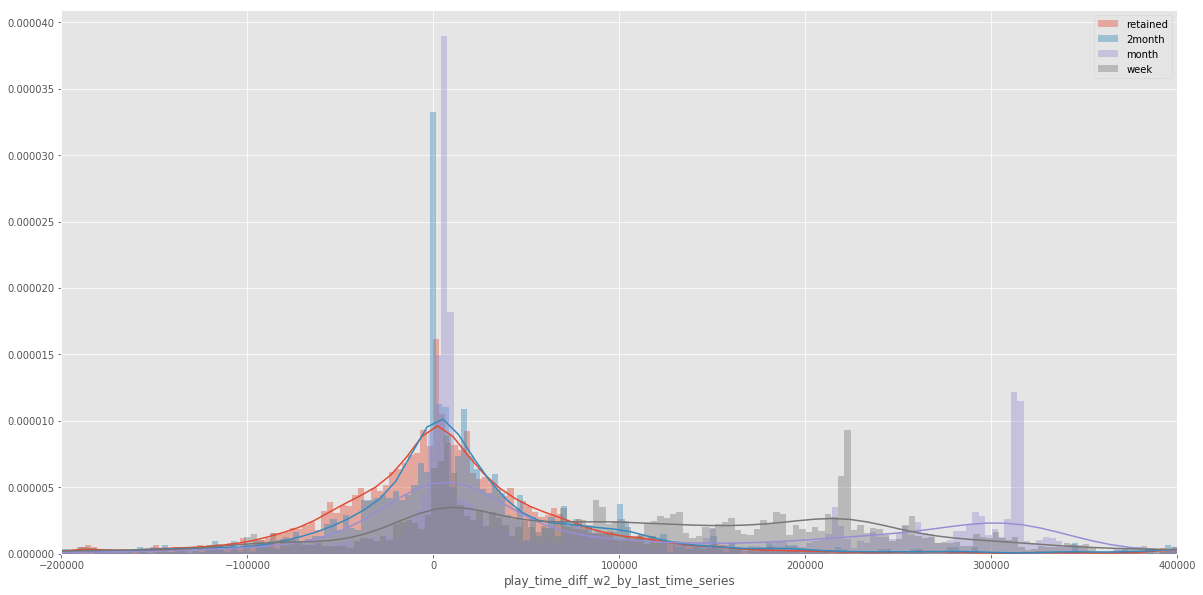

In [224]:
plt.figure(figsize=(20,10))

sns.distplot(detect[detect.label=='retained'].play_time_diff_w2_by_last_time_series,label='retained',bins=300).set_xlim(-200000,400000)

sns.distplot(detect[detect.label=='2month'].play_time_diff_w2_by_last_time_series,label='2month' ,bins=300)

sns.distplot(detect[detect.label=='month'].play_time_diff_w2_by_last_time_series,label='month' ,bins=300)

sns.distplot(detect[detect.label=='week'].play_time_diff_w2_by_last_time_series,label='week' ,bins=300)

plt.legend()
plt.show()

# 본캐 부캐 둘다 키우는 유저의 경우

##  diff2_by_last_time

> retained 유저는 마지막 주차 대비 2주차의 접속시간 변동이 그렇게 크지 않음을 알 수 있다
 
> 하지만 이탈유저, 특히 week과 month 유저들은 접속 시간이 급격히 다름을 알 수 있다. 즉, 꾸준히 플레이하지 않고 갑작스럽게 접속시간을 줄여 버렸음을 알 수 있다.

## 결론 Group_c (본캐 부캐 둘다 키우는 그룹)

> 1. 거래 횟수 대비 전투시간의 비율이 급격히 증가한다.

> 2. 다른 유저와 사회적 활동(채팅)이 빈번하지 않다.

> 3. 마지막 주차 대비 2주차의 플레이시간 차이가 크다.